<H1> The Battle of Neighborhoods (Week 2) <H1>

### Import the library 

In [32]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import csv
import sys

# Matplotlib and associated plotting modules
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import folium # map rendering library
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

print("Libraries imported.")

Solving environment: done

# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/SHASAN01/opt/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be DOWNGRADED:

  folium                                        0.10.1-py_0 --> 0.5.0-py_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


In [33]:
!conda install -c conda-forge folium --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/SHASAN01/opt/anaconda3

  added / updated specs:
    - folium


The following packages will be UPDATED:

  folium                                         0.5.0-py_0 --> 0.10.1-py_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


##  Data to be imported

### Using Foursquare for the central area of the city of Chicago and 
### check the number of venues that are relevant for our analysis.

In [34]:
# Foursquare credentials
CLIENT_ID = 'MZSLLG34ER2GNJV2J3BNLXMVUZALZZ2KR3EXDZVSDNAKGMGQ' # your Foursquare ID
CLIENT_SECRET = '04TGJKQHYOBRKUZVCKKYPDSR5Y5YNP3IXS2IJACB0HSPGUNH' # your Foursquare Secret
VERSION = '20200414'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MZSLLG34ER2GNJV2J3BNLXMVUZALZZ2KR3EXDZVSDNAKGMGQ
CLIENT_SECRET:04TGJKQHYOBRKUZVCKKYPDSR5Y5YNP3IXS2IJACB0HSPGUNH


In [35]:
# Find the coordinates for the city hall, City of Chicago 
address = '121 North LaSalle St, chicago, Illinois'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


41.88341706625744 -87.632303164487


In [93]:
search_query = "Japanese*"
radius = 3300
print(search_query + '....OK!')

Japanese*....OK!


In [94]:
hibachi_link= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
 

In [95]:
Hresults = requests.get(hibachi_link).json()
#Hibhachi results

# assign relevant information to venues
venues = Hresults['response']['venues']
# transform venues to a dataframe
dfv = json_normalize(venues)
dfv

/Users/SHASAN01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4c3e115bdb3b1b8d09e66495,Gyu-Kaku Japanese BBQ,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1586886821,False,210 E Ohio St,at N St Clair St,41.892594,-87.622262,"[{'label': 'display', 'lat': 41.89259411246893...",1317,60611,US,Chicago,IL,United States,"[210 E Ohio St (at N St Clair St), Chicago, IL...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b4cb5b8f964a52042bb26e3,Cocoro Japanese Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1586886821,False,668 N Wells St,NaN,41.894401,-87.634191,"[{'label': 'display', 'lat': 41.89440146780230...",1232,60654,US,Chicago,IL,United States,"[668 N Wells St, Chicago, IL 60654, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4b36df78f964a520aa3d25e3,Niu Japanese Fusion Lounge,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",v-1586886821,False,332 E Illinois St,NaN,41.891016,-87.618674,"[{'label': 'display', 'lat': 41.89101586432625...",1411,60611,US,Chicago,IL,United States,"[332 E Illinois St, Chicago, IL 60611, United ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4e4043ef81dc6ce0fac9d80b,Japanese Steak House & Sushi,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1586886821,False,120 Jackson Blvd.,NaN,41.878691,-87.626053,"[{'label': 'display', 'lat': 41.8786912, 'lng'...",738,NaN,US,Chicago,IL,United States,"[120 Jackson Blvd., Chicago, IL, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49ece2a5f964a520aa671fe3,Kohan Japanese Restaurantâ,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",v-1586886821,False,730 W Maxwell St,NaN,41.864803,-87.646404,"[{'label': 'display', 'lat': 41.86480311125810...",2378,60607,US,Chicago,IL,United States,"[730 W Maxwell St, Chicago, IL 60607, United S...",60579,https://www.grubhub.com/restaurant/kohan-japan...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
5,59e26f4b3b830717f71f0e50,"The Mitsubishi Bank Galleries Of Chinese, Japa...","[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1586886821,False,Art Institure,NaN,41.879469,-87.623617,"[{'label': 'display', 'lat': 41.879469, 'lng':...",843,60603,US,Chicago,IL,United States,"[Art Institure, Chicago, IL 60603, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,51018fa2e4b0ca484f8ac272,UMAI Japanese Kitchen & Sushi,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1586886821,False,730 S Clark St,at W Polk St,41.872213,-87.630724,"[{'label': 'display', 'lat': 41.87221295586109...",1254,60605,US,Chicago,IL,United States,"[730 S Clark St (at W Polk St), Chicago, IL 60...",276582,https://www.grubhub.com/restaurant/umai-sushi-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
7,58dab7942f91cb72e82922ab,Clarence Buckingham Gallery Of Japanese Prints,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1586886821,False,NaN,NaN,41.879269,-87.623586,"[{'label': 'display', 'lat': 41.879269, 'lng':...",857,60603,US,Chicago,IL,United States,"[Chicago, IL 60603, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,52b1e1ab11d269cf124d5fbd,Ajida Ramen,"[{'id': '55a59bace4b013909087cb24', 'name': 'R...",v-1586886821,False,201 N Wells St,NaN,41.885905,-87.633669,"[{'label': 'display', 'lat': 41.88590505343154...",299,60606,US,Chicago,IL,United States,"[201 N Wells St, Chicago, IL 60606, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,377243422
9,54606dc7498ecc555762042b,Shogun Japanese Restaurant,[],v-1586886821,False,NaN,NaN,41.896524,-87.623822,"[{'label': 'display', 'lat': 41.896524, 'lng':...",1619,NaN,US,Chicago,IL,United States,"[Chicago, IL, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
## print the number of rows of the dataframe
dfv.shape

(16, 24)

In [177]:
# Now for some data-wrangling. Drop the columns I don't need. 
filtered_columns = ['name', 'categories'] + [col for col in dfv.columns if col.startswith('location.')] +  ['id']
dfv_filtered = dfv.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfv_filtered['categories'] = dfv_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dfv_filtered.columns = [column.split('.')[-1] for column in dfv_filtered.columns]

dfv_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,210 E Ohio St,at N St Clair St,41.892594,-87.622262,"[{'label': 'display', 'lat': 41.89259411246893...",1317,60611,US,Chicago,IL,United States,"[210 E Ohio St (at N St Clair St), Chicago, IL...",4c3e115bdb3b1b8d09e66495
1,Cocoro Japanese Restaurant,Japanese Restaurant,668 N Wells St,NaN,41.894401,-87.634191,"[{'label': 'display', 'lat': 41.89440146780230...",1232,60654,US,Chicago,IL,United States,"[668 N Wells St, Chicago, IL 60654, United Sta...",4b4cb5b8f964a52042bb26e3
2,Niu Japanese Fusion Lounge,Sushi Restaurant,332 E Illinois St,NaN,41.891016,-87.618674,"[{'label': 'display', 'lat': 41.89101586432625...",1411,60611,US,Chicago,IL,United States,"[332 E Illinois St, Chicago, IL 60611, United ...",4b36df78f964a520aa3d25e3
3,Japanese Steak House & Sushi,Japanese Restaurant,120 Jackson Blvd.,NaN,41.878691,-87.626053,"[{'label': 'display', 'lat': 41.8786912, 'lng'...",738,NaN,US,Chicago,IL,United States,"[120 Jackson Blvd., Chicago, IL, United States]",4e4043ef81dc6ce0fac9d80b
4,Kohan Japanese Restaurantâ,Sushi Restaurant,730 W Maxwell St,NaN,41.864803,-87.646404,"[{'label': 'display', 'lat': 41.86480311125810...",2378,60607,US,Chicago,IL,United States,"[730 W Maxwell St, Chicago, IL 60607, United S...",49ece2a5f964a520aa671fe3
5,"The Mitsubishi Bank Galleries Of Chinese, Japa...",Art Museum,Art Institure,NaN,41.879469,-87.623617,"[{'label': 'display', 'lat': 41.879469, 'lng':...",843,60603,US,Chicago,IL,United States,"[Art Institure, Chicago, IL 60603, United States]",59e26f4b3b830717f71f0e50
6,UMAI Japanese Kitchen & Sushi,Japanese Restaurant,730 S Clark St,at W Polk St,41.872213,-87.630724,"[{'label': 'display', 'lat': 41.87221295586109...",1254,60605,US,Chicago,IL,United States,"[730 S Clark St (at W Polk St), Chicago, IL 60...",51018fa2e4b0ca484f8ac272
7,Clarence Buckingham Gallery Of Japanese Prints,Art Museum,NaN,NaN,41.879269,-87.623586,"[{'label': 'display', 'lat': 41.879269, 'lng':...",857,60603,US,Chicago,IL,United States,"[Chicago, IL 60603, United States]",58dab7942f91cb72e82922ab
8,Ajida Ramen,Ramen Restaurant,201 N Wells St,NaN,41.885905,-87.633669,"[{'label': 'display', 'lat': 41.88590505343154...",299,60606,US,Chicago,IL,United States,"[201 N Wells St, Chicago, IL 60606, United Sta...",52b1e1ab11d269cf124d5fbd
9,Shogun Japanese Restaurant,None,NaN,NaN,41.896524,-87.623822,"[{'label': 'display', 'lat': 41.896524, 'lng':...",1619,NaN,US,Chicago,IL,United States,"[Chicago, IL, United States]",54606dc7498ecc555762042b


In [176]:
dfv_filtered.shape

(16, 15)

In [352]:
# drop cells with that is Not necessary

dfv_filtered_dropna = dfv_filtered[dfv_filtered.categories != "*Restaurant*"].reset_index(drop=True)
dfv_filtered_dropna
dfv_filtered_dropna.drop(['labeledLatLngs','crossStreet','address','formattedAddress','id','country','cc','state','city'], axis = 1) 

,name,categories,lat,lng,distance,postalCode
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,41.892594,-87.622262,1317,60611
1,Cocoro Japanese Restaurant,Japanese Restaurant,41.894401,-87.634191,1232,60654
2,Niu Japanese Fusion Lounge,Sushi Restaurant,41.891016,-87.618674,1411,60611
3,Japanese Steak House & Sushi,Japanese Restaurant,41.878691,-87.626053,738,NaN
4,Kohan Japanese Restaurantâ,Sushi Restaurant,41.864803,-87.646404,2378,60607
5,"The Mitsubishi Bank Galleries Of Chinese, Japa...",Art Museum,41.879469,-87.623617,843,60603
6,UMAI Japanese Kitchen & Sushi,Japanese Restaurant,41.872213,-87.630724,1254,60605
7,Clarence Buckingham Gallery Of Japanese Prints,Art Museum,41.879269,-87.623586,857,60603
8,Ajida Ramen,Ramen Restaurant,41.885905,-87.633669,299,60606
9,Shogun Japanese Restaurant,None,41.896524,-87.623822,1619,NaN


In [254]:
# filter categories names 
categories_names = list(dfv_filtered_dropna.categories.unique())

category_chicago = []

for x in categories_names:
        category_chicago.append(x)
        
category_chicago

['Japanese Restaurant',
 'Sushi Restaurant',
 'Art Museum',
 'Ramen Restaurant',
 None,
 'Gift Shop']

In [337]:
# create a new DataFrame with only categories that contain the word restaurant

dfv_filtered_dropna = dfv_filtered_dropna[dfv_filtered_dropna['categories'].isin(category_chicago)].reset_index(drop=True)
print(dfv_filtered_dropna.shape)
dfv_filtered_dropna.head()
drv_final = dfv_filtered_dropna.drop(['labeledLatLngs','crossStreet','formattedAddress','address','id','country','cc','state','city'], axis = 1)
drv_final

(16, 15)


,name,categories,lat,lng,distance,postalCode
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,41.892594,-87.622262,1317,60611
1,Cocoro Japanese Restaurant,Japanese Restaurant,41.894401,-87.634191,1232,60654
2,Niu Japanese Fusion Lounge,Sushi Restaurant,41.891016,-87.618674,1411,60611
3,Japanese Steak House & Sushi,Japanese Restaurant,41.878691,-87.626053,738,NaN
4,Kohan Japanese Restaurantâ,Sushi Restaurant,41.864803,-87.646404,2378,60607
5,"The Mitsubishi Bank Galleries Of Chinese, Japa...",Art Museum,41.879469,-87.623617,843,60603
6,UMAI Japanese Kitchen & Sushi,Japanese Restaurant,41.872213,-87.630724,1254,60605
7,Clarence Buckingham Gallery Of Japanese Prints,Art Museum,41.879269,-87.623586,857,60603
8,Ajida Ramen,Ramen Restaurant,41.885905,-87.633669,299,60606
9,Shogun Japanese Restaurant,None,41.896524,-87.623822,1619,NaN


#### Now we have a list of all restaurants available in Foursquare that are located in city of Chicago 
#### within proximity of the City Hall. Now let's plot this on a map and save the variable for later use.

In [240]:
# generate map centred around the City Hall
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=40,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Japanese restaurants as Black markers

for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=30,
        color='black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map


<H4> Now lets look at list of all musuem and parks available in Foursquare that are located 
within proximity of the City Hall of Chicago. Now let's plot this on a map and save the variable for later use.< H4>

In [241]:
# category id for parks and museum  
#search_query = "Park" and "Museum"
categoryId = "4bf58dd8d48988d163941735,4bf58dd8d48988d181941735" 

popular_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
popular_results = requests.get(popular_url).json()

# assign relevant information to the venues
popular = popular_results['response']['venues']

# transform to a dataframe

dfvp = json_normalize(popular)
dfvp.head()

/Users/SHASAN01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4a622a61f964a5203dc31fe3,Chicago Cultural Center,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",v-1586976982,False,78 E Washington St,btwn N Michigan & N Garland Ct.,41.883640,-87.624671,"[{'label': 'display', 'lat': 41.88364026331096...",633,60602,US,Chicago,IL,United States,[78 E Washington St (btwn N Michigan & N Garla...,92507473,NaN
1,4bc23b61b492d13a1539a760,Museum Campus,"[{'id': '4bf58dd8d48988d162941735', 'name': 'O...",v-1586976982,False,Burnham Park,btwn Roosevelt Rd & 18th Dr,41.866637,-87.614336,"[{'label': 'display', 'lat': 41.86663663899534...",2388,60601,US,Chicago,IL,United States,"[Burnham Park (btwn Roosevelt Rd & 18th Dr), C...",NaN,NaN
2,42b75880f964a52090251fe3,Millennium Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1586976982,False,201 E Randolph St,btwn Columbus Dr & Michigan Ave,41.883112,-87.623851,NaN,701,60601,US,Chicago,IL,United States,[201 E Randolph St (btwn Columbus Dr & Michiga...,NaN,Grant Park
3,4c47533649fa9521cb1f5e62,Grant Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1586976982,False,337 E Randolph Dr,at Michigan Ave,41.876626,-87.619263,"[{'label': 'display', 'lat': 41.8766257847394,...",1318,60601,US,Chicago,IL,United States,"[337 E Randolph Dr (at Michigan Ave), Chicago,...",NaN,NaN
4,49e9ef74f964a52011661fe3,The Art Institute of Chicago,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1586976982,False,111 S Michigan Ave,btwn Monroe St & Jackson Dr,41.879689,-87.623258,NaN,856,60603,US,Chicago,IL,United States,[111 S Michigan Ave (btwn Monroe St & Jackson ...,81788905,Grant Park


<H4> Now that, we have found the current locations of places where we have Japanese restaurants near city hall in downtown Chicago. 
 let me now find and plot the venues or locations where there are popular places like parks or museum.
 popular places are visited by more people in Chicago downtown area all year long, lots of other stores are also
 in that vacinity.<H4>

In [242]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col for col in dfvp.columns if col.startswith('location.')] + ['id']
dfvp_filtered = dfvp.loc[:, filtered_columns2]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfvp_filtered['categories'] = dfvp_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dfvp_filtered.columns = [column.split('.')[-1] for column in dfvp_filtered.columns]

dfvp_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Chicago Cultural Center,Museum,78 E Washington St,btwn N Michigan & N Garland Ct.,41.883640,-87.624671,"[{'label': 'display', 'lat': 41.88364026331096...",633,60602,US,Chicago,IL,United States,[78 E Washington St (btwn N Michigan & N Garla...,NaN,4a622a61f964a5203dc31fe3
1,Museum Campus,Other Great Outdoors,Burnham Park,btwn Roosevelt Rd & 18th Dr,41.866637,-87.614336,"[{'label': 'display', 'lat': 41.86663663899534...",2388,60601,US,Chicago,IL,United States,"[Burnham Park (btwn Roosevelt Rd & 18th Dr), C...",NaN,4bc23b61b492d13a1539a760
2,Millennium Park,Park,201 E Randolph St,btwn Columbus Dr & Michigan Ave,41.883112,-87.623851,NaN,701,60601,US,Chicago,IL,United States,[201 E Randolph St (btwn Columbus Dr & Michiga...,Grant Park,42b75880f964a52090251fe3
3,Grant Park,Park,337 E Randolph Dr,at Michigan Ave,41.876626,-87.619263,"[{'label': 'display', 'lat': 41.8766257847394,...",1318,60601,US,Chicago,IL,United States,"[337 E Randolph Dr (at Michigan Ave), Chicago,...",NaN,4c47533649fa9521cb1f5e62
4,The Art Institute of Chicago,Art Museum,111 S Michigan Ave,btwn Monroe St & Jackson Dr,41.879689,-87.623258,NaN,856,60603,US,Chicago,IL,United States,[111 S Michigan Ave (btwn Monroe St & Jackson ...,Grant Park,49e9ef74f964a52011661fe3
5,Maggie Daley Park,Park,337 E Randolph Dr,btwn Lake Shore Dr & Columbus Dr,41.882905,-87.618846,"[{'label': 'display', 'lat': 41.88290461159236...",1116,60601,US,Chicago,IL,United States,[337 E Randolph Dr (btwn Lake Shore Dr & Colum...,Grant Park,50b69e52e4b023feffc3b3ae
6,225 N Michigan Avenue,Office,225 N Michigan Ave,NaN,41.885902,-87.624321,"[{'label': 'display', 'lat': 41.88590247541995...",717,60601,US,Chicago,IL,United States,"[225 N Michigan Ave, Chicago, IL 60601, United...",NaN,4bf28f9382002d7f96aad0bb
7,A. Montgomery Ward Park,Park,630 N Kingsbury Ave,btwn W Erie St & W Ontario St,41.893546,-87.641660,"[{'label': 'display', 'lat': 41.89354629090404...",1368,60606,US,Chicago,IL,United States,[630 N Kingsbury Ave (btwn W Erie St & W Ontar...,NaN,4e06204e6284d9ee92cd00e7
8,311 S Wacker Dr Park,Park,311 S Wacker Dr,at W Jackson Blvd,41.878046,-87.636378,"[{'label': 'display', 'lat': 41.87804613315607...",686,60606,US,Chicago,IL,United States,"[311 S Wacker Dr (at W Jackson Blvd), Chicago,...",NaN,4bfabb734a67c928a0aa28cf
9,Heritage Green Park,Park,610-30 W Adams St,at Des Plaines,41.879779,-87.640068,"[{'label': 'display', 'lat': 41.87977914781557...",760,60606,US,Chicago,IL,United States,"[610-30 W Adams St (at Des Plaines), Chicago, ...",NaN,4bb27b3714cfd13a540015ab


<H3> Getting the count for each venue per postalCode. <H3>

In [243]:
dfvp_filtered.groupby(["postalCode", "categories", "name"]).count()

address  \
postalCode categories           name                                          
60601      Harbor / Marina      DuSable Harbor                            1   
           Office               225 N Michigan Avenue                     1   
           Other Great Outdoors Museum Campus                             1   
           Park                 Grant Park                                1   
                                Lakeshore East Park                       1   
                                Maggie Daley Park                         1   
                                Millennium Park                           1   
60602      Museum               Chicago Cultural Center                   1   
60603      Art Gallery          The Modern Wing                           1   
           Art Museum           The Art Institute of Chicago              1   
           Museum               Thorne Miniature Rooms                    1   
           Park                 Grant Park - Butler Field                 1   
60605      Dog Run              Coliseum Park                             1   
           History Museum       The Field Museum                          1   
           Park                 Burnham Park                              1   
                                Northerly Island                          1   
           Planetarium          Adler Planetarium                         1   
           Trail                Lakefront Trail                           0   
60606      Park                 311 S Wacker Dr Park                      1   
                                A. Montgomery Ward Park                   1   
                                Heritage Green Park                       1   
60607      Museum               wndr museum                               1   
           Park                 Arrigo Park                               1   
                                Garibaldi (Giuseppi) Park                 1   
                                Mary Bartelme Park                        1   
                                Sheridan Park                             1   
                                Skinner Park                              1   
                                Union Park                                1   
60610      History Museum       The Charnley-Persky House                 1   
           Park                 Seward Park                               1   
                                Washington Square Park                    1   
60611      Art Museum           Museum of Contemporary Art Chicago        1   
           Beach                Oak Street Beach                          1   
                                Ohio Street Beach                         1   
           Museum               Chicago Sports Museum                     1   
                                The Arts Club Of Chicago                  1   
           Park                 Connors Park                              1   
                                Jane Addams Memorial Park                 1   
                                Lake Shore Park                           1   
                                Milton L Olive III Park                   1   
                                Polk Bros Park                            1   
60614      History Museum       Chicago History Museum                    1   
60616      History Museum       Chinese-American Museum                   1   
           Park                 Fred Anderson Park                        1   
                                Ping Tom Memorial Park                    1   
                                Prairie District Park                     0   
                                Sun Yat-Sen Park                          1   
60622      Playground           Bickerdike Square Park                    1   
60642      Park                 Eckhart Park                              1   

                                      

In [244]:
print('There are {} uniques categories.'.format(len(dfvp_filtered['categories'].unique())))

There are 13 uniques categories.


In [245]:
dfvp_filtered['categories'].unique()[:50]

array(['Museum', 'Other Great Outdoors', 'Park', 'Art Museum', 'Office',
       'Trail', 'History Museum', 'Planetarium', 'Art Gallery', 'Beach',
       'Playground', 'Harbor / Marina', 'Dog Run'], dtype=object)

<H4> Analyze Data <H4>

In [246]:
# one hot encoding
chicago_onehot = pd.get_dummies(dfvp_filtered[['categories']], prefix="", prefix_sep="")

# add postal, Categories column back to dataframe
chicago_onehot['postalCode'] = dfvp_filtered['postalCode'] 
chicago_onehot['categories'] = dfvp_filtered['categories'] 
chicago_onehot['name'] = dfvp_filtered['name'] 

# move postal, categories and neighborhood column to the first column
fixed_columns = list(chicago_onehot.columns[-3:]) + list(chicago_onehot.columns[:-3])
chicago_onehot = chicago_onehot[fixed_columns]

print(chicago_onehot.shape)
chicago_onehot.head()

(50, 16)


,postalCode,categories,name,Art Gallery,Art Museum,Beach,Dog Run,Harbor / Marina,History Museum,Museum,Office,Other Great Outdoors,Park,Planetarium,Playground,Trail
0,60602,Museum,Chicago Cultural Center,0,0,0,0,0,0,1,0,0,0,0,0,0
1,60601,Other Great Outdoors,Museum Campus,0,0,0,0,0,0,0,0,1,0,0,0,0
2,60601,Park,Millennium Park,0,0,0,0,0,0,0,0,0,1,0,0,0
3,60601,Park,Grant Park,0,0,0,0,0,0,0,0,0,1,0,0,0
4,60603,Art Museum,The Art Institute of Chicago,0,1,0,0,0,0,0,0,0,0,0,0,0


In [247]:
##.  Let us now see the mean on each venues by postal code

chicago_grouped = chicago_onehot.groupby(["postalCode","categories"]).mean().reset_index()

print(chicago_grouped.shape)
chicago_grouped

(28, 15)


,postalCode,categories,Art Gallery,Art Museum,Beach,Dog Run,Harbor / Marina,History Museum,Museum,Office,Other Great Outdoors,Park,Planetarium,Playground,Trail
0,60601,Harbor / Marina,0,0,0,0,1,0,0,0,0,0,0,0,0
1,60601,Office,0,0,0,0,0,0,0,1,0,0,0,0,0
2,60601,Other Great Outdoors,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60601,Park,0,0,0,0,0,0,0,0,0,1,0,0,0
4,60602,Museum,0,0,0,0,0,0,1,0,0,0,0,0,0
5,60603,Art Gallery,1,0,0,0,0,0,0,0,0,0,0,0,0
6,60603,Art Museum,0,1,0,0,0,0,0,0,0,0,0,0,0
7,60603,Museum,0,0,0,0,0,0,1,0,0,0,0,0,0
8,60603,Park,0,0,0,0,0,0,0,0,0,1,0,0,0
9,60605,Dog Run,0,0,0,1,0,0,0,0,0,0,0,0,0


<h4> Now let's create the new dataframe and display the top 10 venues for each PostalCode <h4>

In [248]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['postalCode' , 'categories' ] #, 'Name']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe

chicago_venues_sorted = pd.DataFrame(columns=columns)
chicago_venues_sorted['postalCode'] = chicago_grouped['postalCode']
chicago_venues_sorted['categories'] = chicago_grouped['categories']


for ind in np.arange(chicago_grouped.shape[0]):
    row_categories = chicago_grouped.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    chicago_venues_sorted.iloc[ind, 2:] = row_categories_sorted.index.values[0:num_top_venues]
    
chicago_venues_sorted.sort_values(freqColumns, inplace=True)
print(chicago_venues_sorted.shape)
chicago_venues_sorted

(28, 12)


,postalCode,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,60603,Art Museum,Art Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,History Museum,Harbor / Marina
19,60611,Art Museum,Art Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,History Museum,Harbor / Marina
20,60611,Beach,Beach,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,History Museum,Harbor / Marina
9,60605,Dog Run,Dog Run,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,History Museum,Harbor / Marina
0,60601,Harbor / Marina,Harbor / Marina,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,History Museum,Dog Run
10,60605,History Museum,History Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,Harbor / Marina,Dog Run
17,60610,History Museum,History Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,Harbor / Marina,Dog Run
23,60614,History Museum,History Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,Harbor / Marina,Dog Run
24,60616,History Museum,History Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,Harbor / Marina,Dog Run
4,60602,Museum,Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,History Museum,Harbor / Marina,Dog Run


<H2> Cluster Areas <H2>

In [362]:
# set number of clusters
kclusters = 5
#
chicago_grouped_clustering = chicago_grouped.drop(["postalCode","categories"], 1)
 
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)
 
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
 

array([0, 0, 0, 1, 3, 0, 4, 3, 1, 0], dtype=int32)

In [364]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
chicago_merged =  drv_final.copy()
 
# add clustering labels
#chicago_merged["Cluster Labels"] = kmeans.labels_

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(chicago_venues_sorted.drop(["categories"], 1).set_index("postalCode"), on="postalCode")

print(chicago_merged.shape)
chicago_merged.head() # check the last columns!

(43, 16)


,name,categories,lat,lng,distance,postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,41.892594,-87.622262,1317,60611,Art Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,History Museum,Harbor / Marina
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,41.892594,-87.622262,1317,60611,Beach,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,Museum,History Museum,Harbor / Marina
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,41.892594,-87.622262,1317,60611,Museum,Trail,Playground,Planetarium,Park,Other Great Outdoors,Office,History Museum,Harbor / Marina,Dog Run
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,41.892594,-87.622262,1317,60611,Park,Trail,Playground,Planetarium,Other Great Outdoors,Office,Museum,History Museum,Harbor / Marina,Dog Run
1,Cocoro Japanese Restaurant,Japanese Restaurant,41.894401,-87.634191,1232,60654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<H4> let us now observe the data and analyze <H4>

In [365]:
# Now Filter out : only keep the items that are category "Park"
dfvp_park = dfvp_filtered
dfvp_park = dfvp_park.loc[dfvp_park.categories == "Park"]
dfvp_park.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
2,Millennium Park,Park,201 E Randolph St,btwn Columbus Dr & Michigan Ave,41.883112,-87.623851,NaN,701,60601,US,Chicago,IL,United States,[201 E Randolph St (btwn Columbus Dr & Michiga...,Grant Park,42b75880f964a52090251fe3
3,Grant Park,Park,337 E Randolph Dr,at Michigan Ave,41.876626,-87.619263,"[{'label': 'display', 'lat': 41.8766257847394,...",1318,60601,US,Chicago,IL,United States,"[337 E Randolph Dr (at Michigan Ave), Chicago,...",NaN,4c47533649fa9521cb1f5e62
5,Maggie Daley Park,Park,337 E Randolph Dr,btwn Lake Shore Dr & Columbus Dr,41.882905,-87.618846,"[{'label': 'display', 'lat': 41.88290461159236...",1116,60601,US,Chicago,IL,United States,[337 E Randolph Dr (btwn Lake Shore Dr & Colum...,Grant Park,50b69e52e4b023feffc3b3ae
7,A. Montgomery Ward Park,Park,630 N Kingsbury Ave,btwn W Erie St & W Ontario St,41.893546,-87.641660,"[{'label': 'display', 'lat': 41.89354629090404...",1368,60606,US,Chicago,IL,United States,[630 N Kingsbury Ave (btwn W Erie St & W Ontar...,NaN,4e06204e6284d9ee92cd00e7
8,311 S Wacker Dr Park,Park,311 S Wacker Dr,at W Jackson Blvd,41.878046,-87.636378,"[{'label': 'display', 'lat': 41.87804613315607...",686,60606,US,Chicago,IL,United States,"[311 S Wacker Dr (at W Jackson Blvd), Chicago,...",NaN,4bfabb734a67c928a0aa28cf


In [366]:
# Filter out : only keep the items that are category "Museum"
dfvp_park = dfvp_filtered
dfvp_museum = dfvp_park.loc[dfvp_park.categories == 'Museum']
dfvp_museum

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Chicago Cultural Center,Museum,78 E Washington St,btwn N Michigan & N Garland Ct.,41.883640,-87.624671,"[{'label': 'display', 'lat': 41.88364026331096...",633,60602,US,Chicago,IL,United States,[78 E Washington St (btwn N Michigan & N Garla...,NaN,4a622a61f964a5203dc31fe3
21,Chicago Sports Museum,Museum,835 N Michigan Ave,btwn Chestnut St & Pearson St,41.897953,-87.622288,"[{'label': 'display', 'lat': 41.89795301943599...",1818,60611,US,Chicago,IL,United States,[835 N Michigan Ave (btwn Chestnut St & Pearso...,NaN,53404b33498eb6afb29b8f0f
36,wndr museum,Museum,1130 W Monroe St,Racine,41.880433,-87.655938,"[{'label': 'display', 'lat': 41.88043256429645...",1986,60607,US,Chicago,IL,United States,"[1130 W Monroe St (Racine), Chicago, IL 60607,...",NaN,5b4ded2188a48b0024f08e46
44,Thorne Miniature Rooms,Museum,Art Institute of Chicago,NaN,41.879532,-87.623680,"[{'label': 'display', 'lat': 41.87953234792995...",835,60603,US,Chicago,IL,United States,"[Art Institute of Chicago, Chicago, IL 60603, ...",NaN,4bc9e614fb84c9b666d61b3e
46,The Arts Club Of Chicago,Museum,201 E Ontario St,NaN,41.892896,-87.622609,"[{'label': 'display', 'lat': 41.89289550956607...",1326,60611,US,Chicago,IL,United States,"[201 E Ontario St, Chicago, IL 60611, United S...",NaN,4f32c27119836c91c7f7757d


<h4>I have now created a dataframe containing the parks in the same neighborhood, which are shown on the map below.
    Let me generate map centred around the City Hall
<H4>

In [367]:

parks_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=40,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(parks_map)

# add the Parks as green markers
for lat, lng, label in zip(dfvp_park.lat, dfvp_park.lng, dfvp_park.categories):
    folium.Circle(
        [lat, lng],
        radius=30,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(parks_map)
    
# add the Museum as BLUE markers
for lat, lng, label in zip(dfvp_museum.lat, dfvp_museum.lng, dfvp_museum.categories):
    folium.Circle(
        [lat, lng],
        radius=30,
        color='Blue',
        popup=label,
        fill = True,
        fill_color='Blue',
        fill_opacity=0.6
    ).add_to(parks_map)
# display map
parks_map

<H4> Now I will combine the two maps where the the map will show the restaurants and also the 
Park and Musuem. This will show the respective points of places in regrads to the City Hall which is shown by "RED" dot,  Park "Yellow" dot , Current Japanese restuarant "Green" dot & Museum "Black" dot <H4>

In [368]:
#. Combine the two map 

combined_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=30,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(combined_map)

# add the Parks as Yellow markers
for lat, lng, label in zip(dfvp_park.lat, dfvp_park.lng, dfvp_park.categories):
    folium.Circle(
        [lat, lng],
        radius=50,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(combined_map)

# add the Japanese non-Hibachi Restaurants as GREEN markers
for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=30,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(combined_map)
    
# add the Museum as BLACK markers
for lat, lng, label in zip(dfvp_museum.lat, dfvp_museum.lng, dfvp_museum.categories):
    folium.Circle(
        [lat, lng],
        radius=35,
        color='Black',
        popup=label,
        fill = True,
        fill_color='Black',
        fill_opacity=0.6
    ).add_to(combined_map)
# display map
combined_map

<H4> Now we have an overview in this combined map the locations of existing Japanese non-hibachi restaurants, and the location of nearby parks and also museums. We can make some decisions based on visual analysis and conclude that there are plenty of opportunities of Hibachi restaurants in the vincinity of a park or Museum combinations which are in close proximity to the  Chicago City hall where different types of tourist,visitors as well a locals visit all year around <H4>

<H3>Numbers and supporting graphs <H3>
<H4>Now let's create some supporting graphs of the data we have used. <H4>

In [369]:
dfvp_park["name"].count()

50

In [370]:
dfv["name"].count()

16

<H4> we are now deducing some observations. there are three observations according to the places we have data for. 
Park , current Japanese restaurants & Museums.We Will look at the distances of each to the city hall and deduce a proposal <H4>

In [166]:
dist = dfvp_park[["distance","name"]]
dist2 = dfv_filtered[["distance","name"]]
dist3 = dfvp_museum[["distance","name"]]

In [167]:
# This data shows the distance between museum and city center 
dist3

,distance,name
0,633,Chicago Cultural Center
28,1818,Chicago Sports Museum
36,835,Thorne Miniature Rooms
44,1986,wndr museum
49,1326,The Arts Club Of Chicago


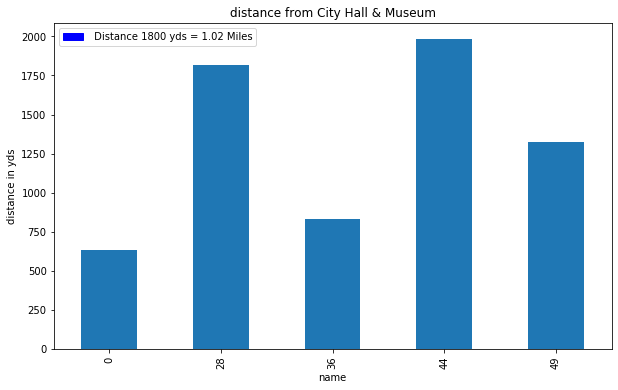

In [307]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dist3.plot(kind='bar', figsize=(10, 6))
plt.xlabel('name')
plt.ylabel('distance in yds')
blue_patch = mpatches.Patch(color='Blue', label=' Distance 1800 yds = 1.02 Miles')
plt.legend(handles=[blue_patch])
plt.title('distance from City Hall & Museum')
plt.show()

In [171]:
# This data shows the distance between park and city center 
dist

,distance,name
0,633,Chicago Cultural Center
1,701,Millennium Park
2,1318,Grant Park
3,856,The Art Institute of Chicago
4,2388,Museum Campus
5,1116,Maggie Daley Park
6,1368,A. Montgomery Ward Park
7,686,311 S Wacker Dr Park
8,3938,Sun Yat-Sen Park
9,2092,Lakefront Trail


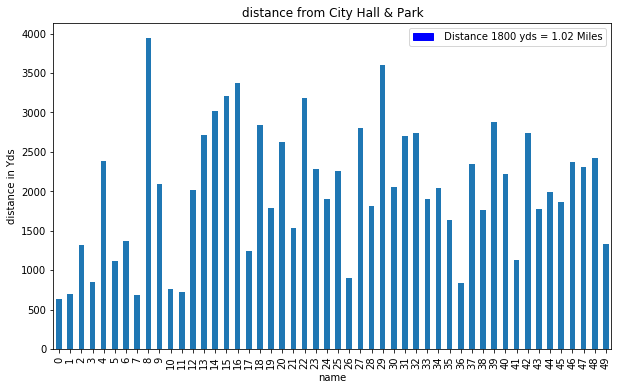

In [306]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dist.plot(kind='bar', figsize=(10, 6))
plt.xlabel('name')
plt.ylabel('distance in Yds')
blue_patch = mpatches.Patch(color='Blue', label=' Distance 1800 yds = 1.02 Miles')
plt.legend(handles=[blue_patch])
plt.title('distance from City Hall & Park')
plt.show()

In [172]:
# # This data shows the distance between existing current Japanese restaurants and city center 
dist2

,distance,name
0,1317,Gyu-Kaku Japanese BBQ
1,1232,Cocoro Japanese Restaurant
2,1411,Niu Japanese Fusion Lounge
3,738,Japanese Steak House & Sushi
4,2378,Kohan Japanese Restaurantâ
5,843,"The Mitsubishi Bank Galleries Of Chinese, Japa..."
6,1254,UMAI Japanese Kitchen & Sushi
7,857,Clarence Buckingham Gallery Of Japanese Prints
8,299,Ajida Ramen
9,1619,Shogun Japanese Restaurant


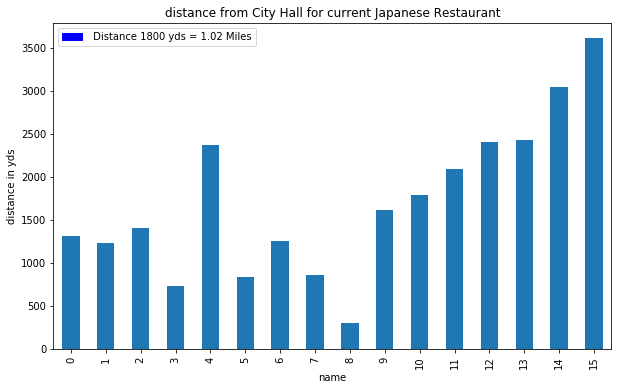

In [308]:
dist2.plot(kind='bar', figsize=(10, 6))
plt.xlabel('name')
plt.ylabel('distance in yds')
blue_patch = mpatches.Patch(color='Blue', label=' Distance 1800 yds = 1.02 Miles')
plt.legend(handles=[blue_patch])
plt.title('distance from City Hall for current Japanese Restaurant')
plt.show()

<H1>  Observation  <H1>

<H4>  Looking at the Graphical overview of the combined locations of existing Japanese non-hibachi restaurants, and the location of nearby parks and also museums. We see that surrounding the City Hall Chicago,  based on visual analysis , that there are plenty of opportunities of Hibachi restaurants circled by a park or Museum. These venues combinations produces  tourists,visitors  locals as well as visitors all year around. More visitors means better chance for a restaurant specially specialty restaurants <H4>

<H1>  Proposal <H1>

<H4> As a proposal for the project :
    >> Best place to open up a Hibachi style restaurant is within 1 miles from the city hall, Chicago ,
    moreover currently no Hibachi style restaurant are in downtown , that is very favorable for opening one.
    >> The number of locals and tourist in downtown chicago very high due to tourist places and parks 
    which makes the location favorable and business will be good. <H3>